In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Identifying and visualizing common relationships in data

## Load and cleaning data

In [11]:
crude_oil_data = pd.read_csv('data/U.S._crude_oil_production.csv')
crude_oil_data.head(5)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [12]:
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [13]:
crude_oil_data.columns[(crude_oil_data.sum(axis=0)) == 0]

Index(['Arizona', 'Virginia'], dtype='object')

In [14]:
crude_oil_data.drop(['Arizona', 'Virginia'], inplace=True, axis=1)
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Month'])
crude_oil_data.drop('Month', inplace=True, axis=1)
crude_oil_data = crude_oil_data.rename(columns={'Federal Offshore Gulf of Mexico Crude Oil': 'Mexico', 
                                                'Federal Offshore Pacific Crude Oil': 'Pacific'})
crude_oil_data['Year'] = crude_oil_data['Date'].dt.year
crude_oil_data['Month'] = crude_oil_data['Date'].dt.month
crude_oil_data.head()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,...,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,...,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,...,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,...,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,...,8,5,145,6,64,1125,1,2008-10-01,2008,10


## Exploring and visualizing relationships

Text(0.5, 1.0, 'U.S Crude Oil Production')

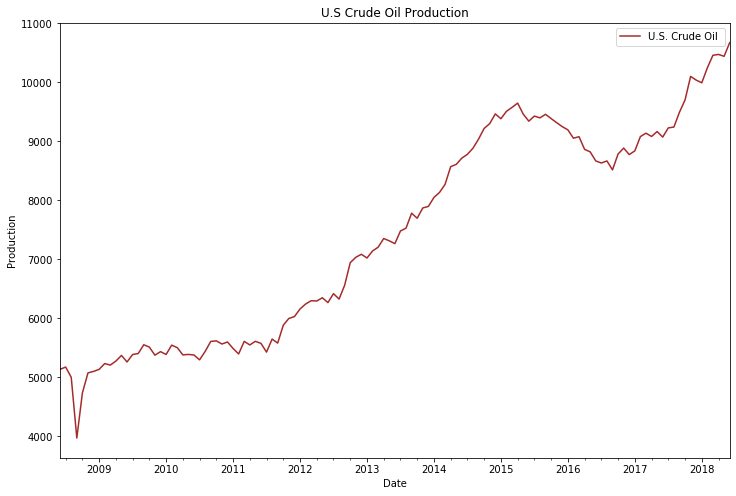

In [15]:
crude_oil_data.plot(x='Date', y='U.S. Crude Oil ', 
                    figsize=(12, 8), color='brown')
plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

Text(0, 0.5, 'Production')

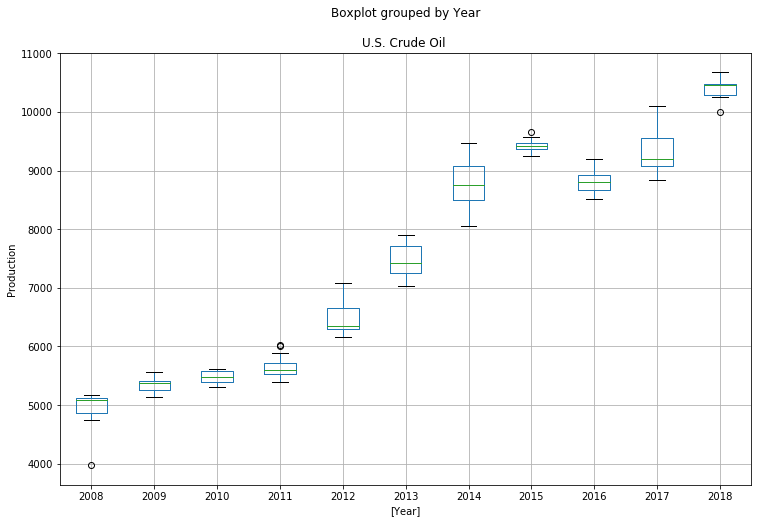

In [18]:
crude_oil_data.boxplot(column=['U.S. Crude Oil '], by=['Year'], 
                       figsize=(12, 8))

plt.ylabel('Production')

Text(0.5, 1.0, 'U.S Crude Oil Production')

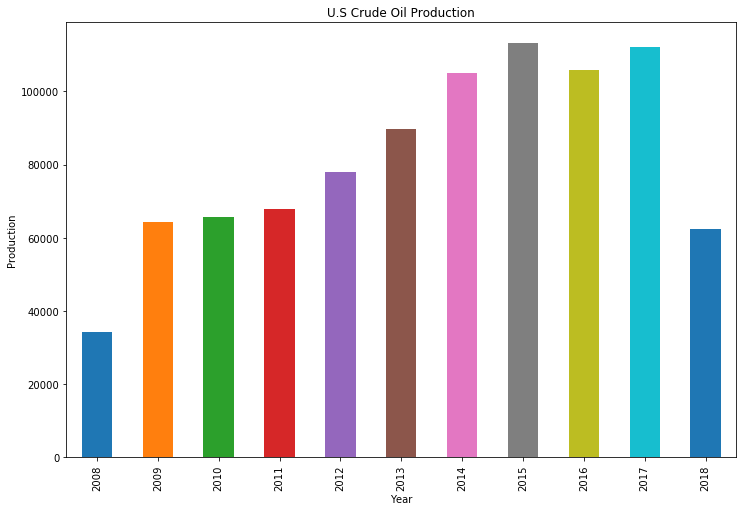

In [20]:
year_data = crude_oil_data.groupby('Year', as_index=False).sum()
year_data[['Year', 'U.S. Crude Oil ']]

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
year_data.plot.bar(x='Year', y='U.S. Crude Oil ', 
                   figsize=(12, 8), color=colors, 
                   legend=False)

plt.ylabel('Production')
plt.title('U.S Crude Oil Production')

In [21]:
mean_prod_data = crude_oil_data.mean().sort_values(ascending=False)
mean_prod_df = pd.DataFrame(mean_prod_data[1:]).reset_index()
mean_prod_df.columns = ['State', 'Production']

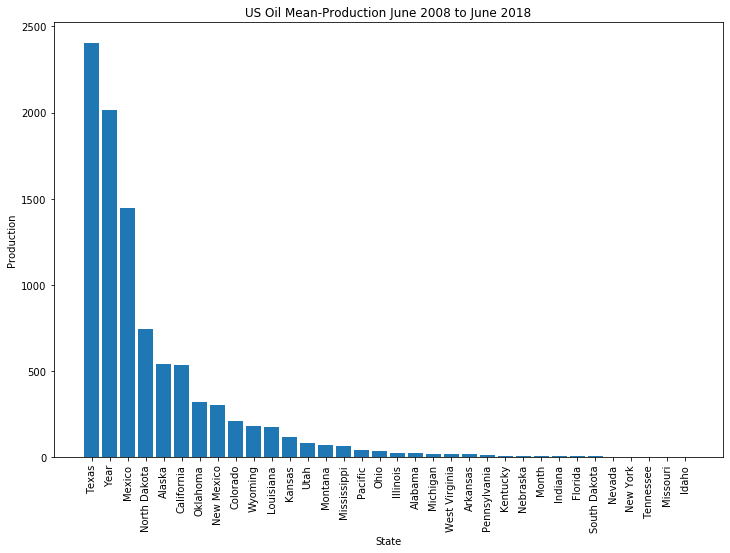

In [22]:
plt.figure(figsize=(12, 8))

plt.bar(mean_prod_df['State'], mean_prod_df['Production'], 
        width=0.85)

plt.title('US Oil Mean-Production June 2008 to June 2018')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')

plt.show()

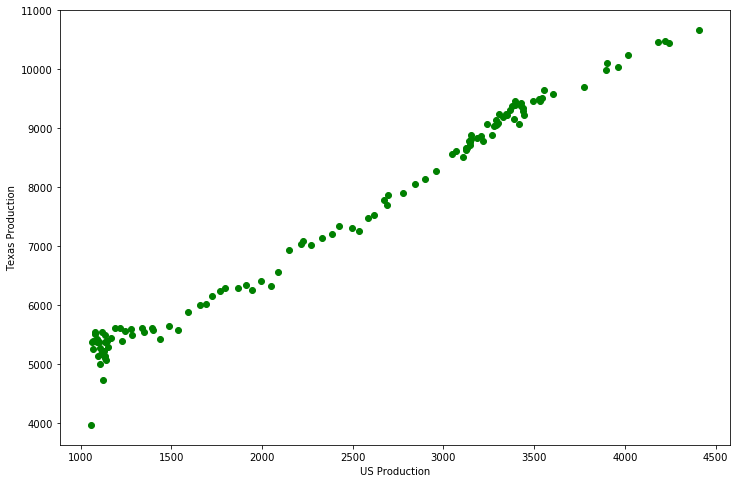

In [23]:
plt.figure(figsize=(12, 8))

plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('US Production')
plt.ylabel('Texas Production')

plt.show()

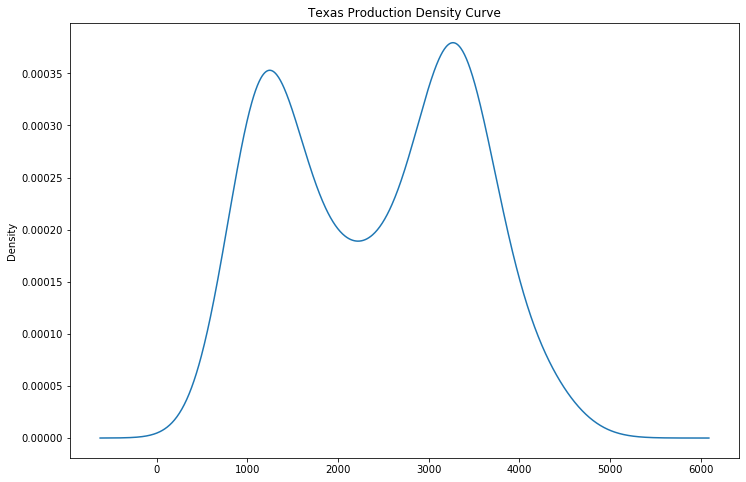

In [24]:
crude_oil_data['Texas'].plot.kde(figsize=(12, 8))
plt.title('Texas Production Density Curve')
plt.show()

## Visualizing linear relationships and correlation

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [26]:
bikesharing_data = pd.read_csv('data/bike_sharing_daily.csv', index_col=0)
bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
np.corrcoef(bikesharing_data['temp'], 
            bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [28]:
bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

In [29]:
pearsonr(bikesharing_data['temp'], 
         bikesharing_data['cnt'])

(0.6274940090334922, 2.8106223975901364e-81)

In [30]:
spearmanr(bikesharing_data['temp'], 
          bikesharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

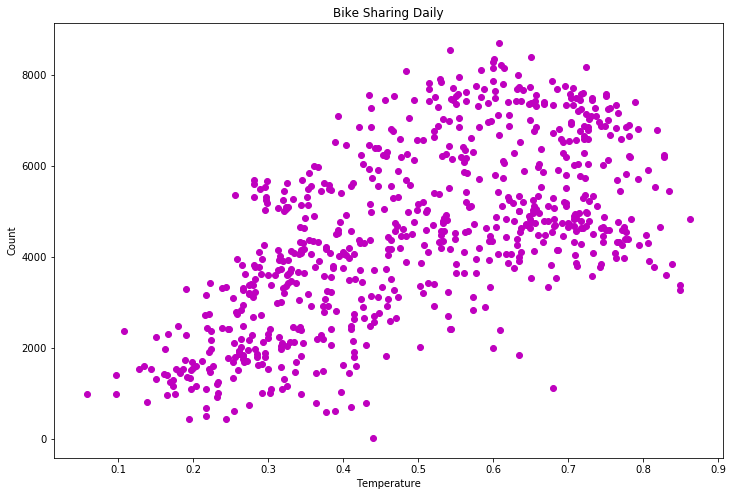

In [31]:
plt.figure(figsize=(12, 8))

plt.scatter(bikesharing_data['temp'], 
            bikesharing_data['cnt'], color='m')

plt.title('Bike Sharing Daily')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [32]:
bikesharing_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


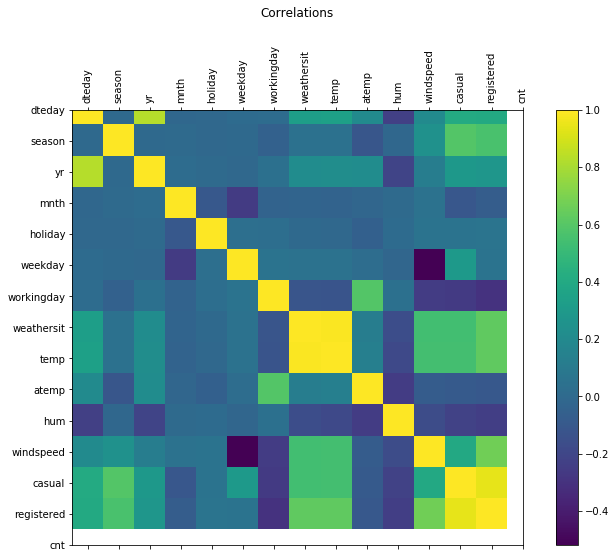

In [33]:
plt.figure(figsize=(12, 8))

plt.matshow(bikesharing_data.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(bikesharing_data.columns)

plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

## Calculation and visualizing autocorrelation

Measures the relationship between a variable's current value and past value

In [34]:
bikesharing_data = pd.read_csv('data/bike_sharing_hourly.csv', index_col=0)
bikesharing_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


In [35]:
bikesharing_data[['temp', 'hum']].describe()

,temp,hum
count,17379.000000,17379.000000
mean,0.496987,0.627229
std,0.192556,0.192930
min,0.020000,0.000000
25%,0.340000,0.480000
50%,0.500000,0.630000
75%,0.660000,0.780000
max,1.000000,1.000000


In [36]:
bikesharing_data[['temp', 'hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [37]:
bikesharing_data['temp'].autocorr(lag=2)

0.9806849149013231

In [38]:
bikesharing_data['temp'].autocorr(lag=12)

0.8250709628213124

In [39]:
bikesharing_data['temp'].autocorr(lag=1002)

0.5654240428575

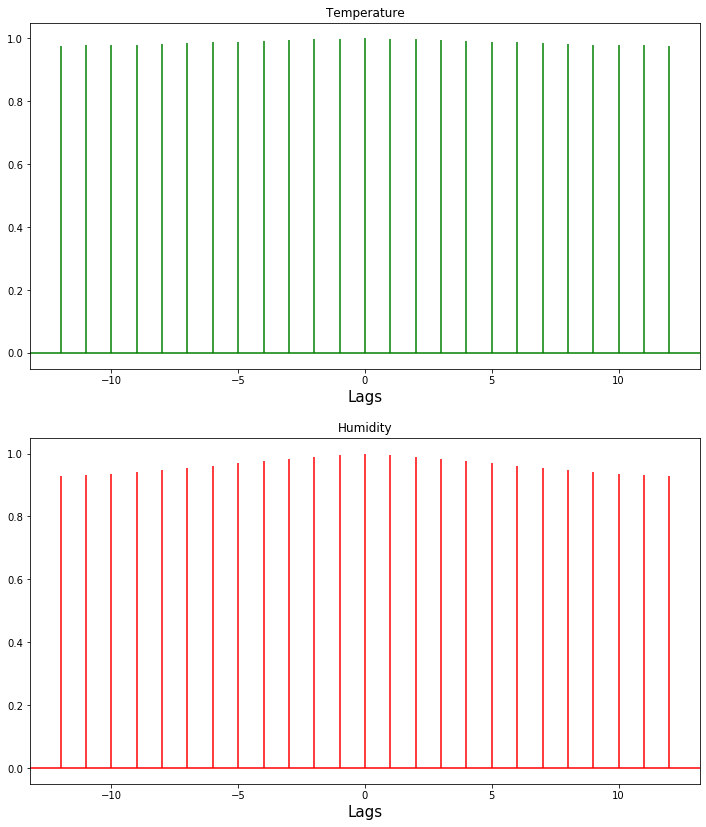

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

ax1.acorr(bikesharing_data['temp'], 
          maxlags=12, color='green')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=15)

ax2.acorr(bikesharing_data['hum'], 
          maxlags=12, color='red')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=15)

plt.show()

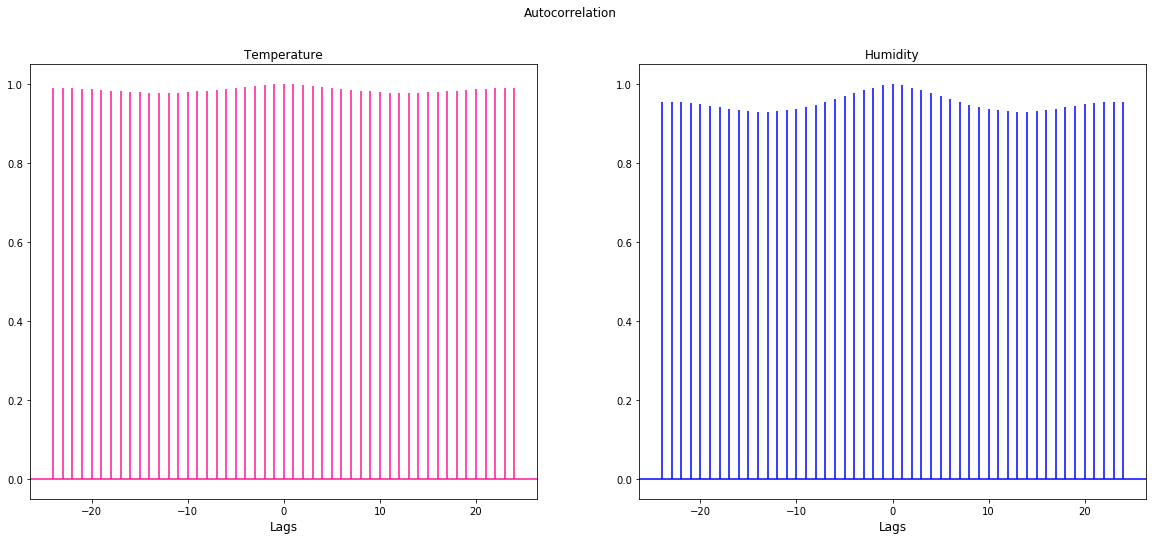

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['temp'], 
          maxlags=24, color='deeppink')

ax1.title.set_text('Temperature')
ax1.set_xlabel('Lags', fontsize=12)

ax2.acorr(bikesharing_data['hum'], 
          maxlags=24, color='blue')

ax2.title.set_text('Humidity')
ax2.set_xlabel('Lags', fontsize=12)

plt.suptitle('Autocorrelation')

plt.show()

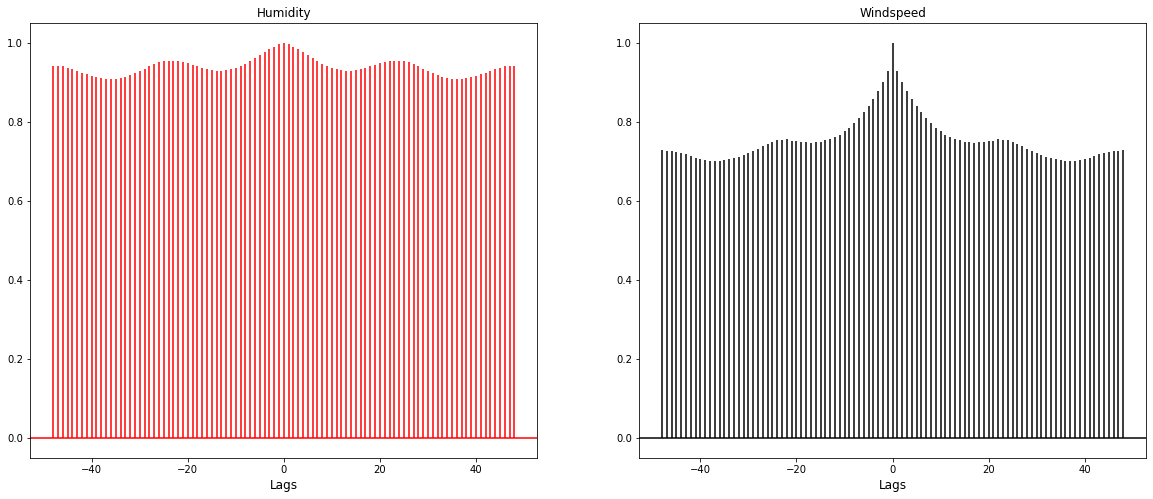

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.acorr(bikesharing_data['hum'], 
          maxlags=48, color='red')

ax1.title.set_text('Humidity')
ax1.set_xlabel('Lags', fontsize=12)

ax2.acorr(bikesharing_data['windspeed'], 
          maxlags=48, color='black')

ax2.title.set_text('Windspeed')
ax2.set_xlabel('Lags', fontsize=12)

plt.show()

## Exploring plots to visualize relationships

In [43]:
bikesharing_data = pd.read_csv('data/bike_sharing_daily.csv', index_col=0)
bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

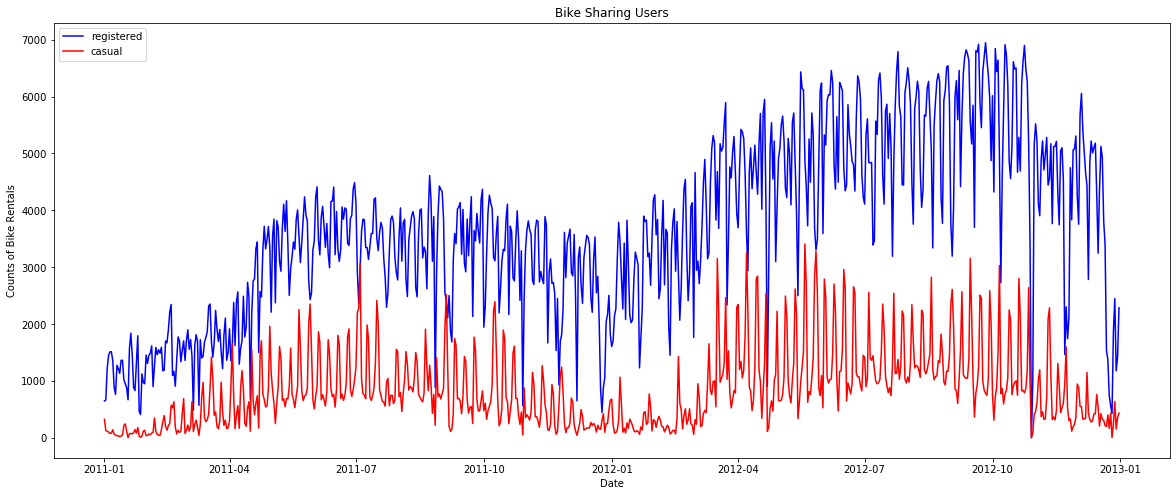

In [45]:
plt.figure(figsize=(20, 8))

plt.plot(bikesharing_data['dteday'], 
         bikesharing_data['registered'], 
         color='b', 
         label='registered')

plt.plot(bikesharing_data['dteday'], 
         bikesharing_data['casual'], 
         color='r', 
         label='casual')

plt.legend(loc='upper left')

plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

## Pairwise relationships

In [46]:
automobile_data_processed = pd.read_csv('data/automobile_data_processed.csv')
automobile_data_processed.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
34,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
155,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
40,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
135,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0
31,1,107.0,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100.0,5500.0,25,31,10345.0


In [47]:
automobile_subset = automobile_data_processed[['horsepower', 'city-mpg', 
                                               'highway-mpg', 'price']]

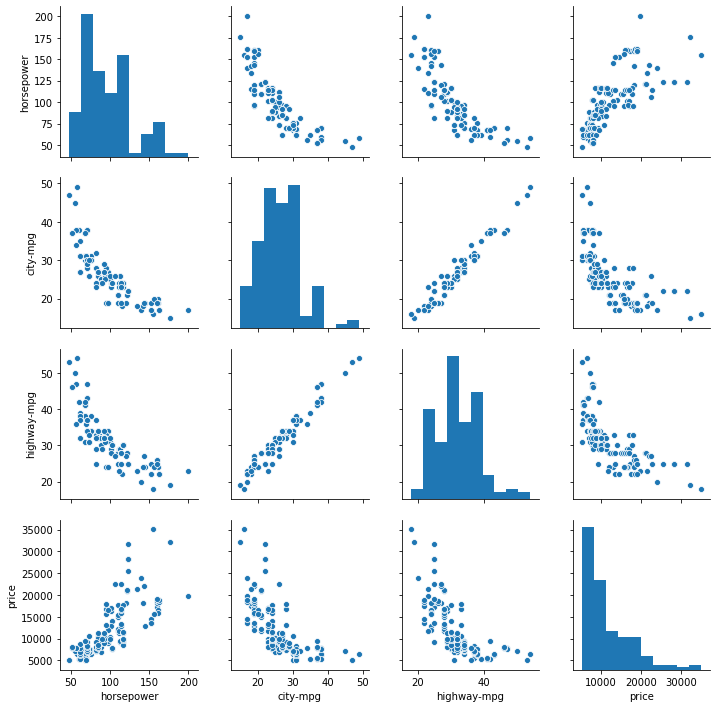

In [49]:
import seaborn as sns
sns.pairplot(automobile_subset)
plt.show()

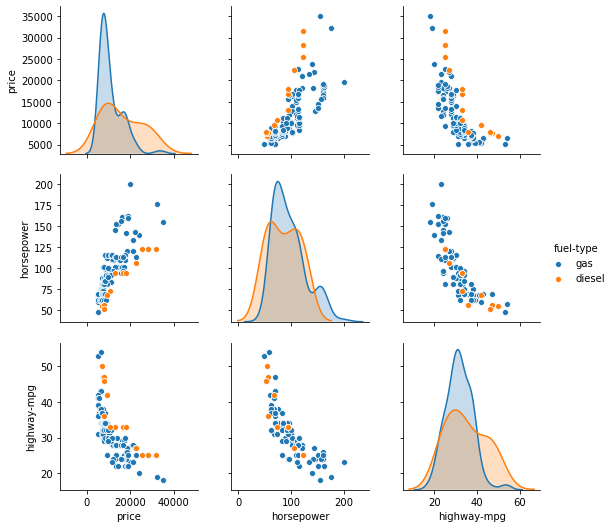

In [50]:
sns.pairplot(automobile_data_processed, 
             vars=['price', 'horsepower', 'highway-mpg'], 
             hue='fuel-type')

plt.show()

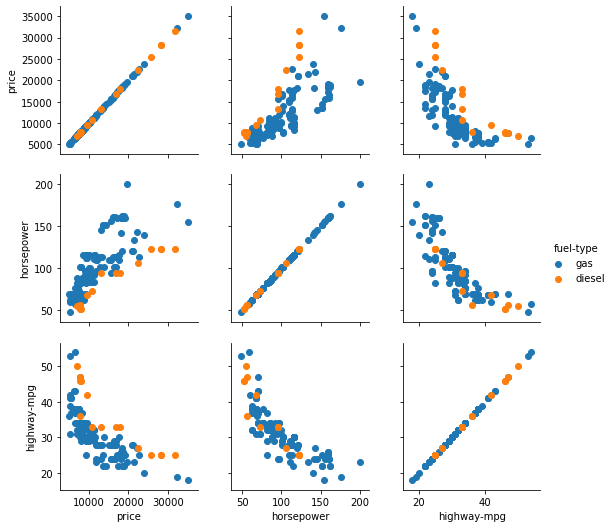

In [51]:
g = sns.PairGrid(automobile_data_processed, 
                 vars=['price', 'horsepower', 'highway-mpg'], 
                 hue='fuel-type')

g.map(plt.scatter)
g.add_legend()
plt.show()